In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import time
from sklearn.manifold import TSNE

from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.tree import *

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final_train.csv', index_col = 0)

In [ ]:
df.head()

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1","fBodyAcc-bandsEnergy()-1,16.2","fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-1,24.1","fBodyAcc-bandsEnergy()-1,24.2","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-1,8.1","fBodyAcc-bandsEnergy()-1,8.2","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-17,24.1","fBodyAcc-bandsEnergy()-17,24.2","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-17,32.1","fBodyAcc-bandsEnergy()-17,32.2","fBodyAcc-bandsEnergy()-25,32","fBodyAcc-bandsEnergy()-25,32.1","fBodyAcc-bandsEnergy()-25,32.2","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-25,48.1","fBodyAcc-bandsEnergy()-25,48.2","fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-33,40.1","fBodyAcc-bandsEnergy()-33,40.2","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-33,48.1","fBodyAcc-bandsEnergy()-33,48.2","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-41,48.2","fBodyAcc-bandsEnergy()-49,56",...,"tGravityAcc-correlation()-Y,Z",tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAccMag-arCoeff()1,tGravityAccMag-arCoeff()2,tGravityAccMag-arCoeff()3,tGravityAccMag-arCoeff()4,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,6.137246,2.503062,5.776680,3.242765,-1.352936,-1.537732,2.828395,8.603183,-2.228620,5.355308,3.987723,1.880228,1.384042,-2.163548,0.483175,2.942713,5.837147,2.957527,-1.770934,-5.580564,13.725027,1.724643,-0.519345,4.233416,0.953127,0.807692,2.624547,-3.005993,3.329588,2.866778,...,2.988204,1.531084,-3.422785,1.852121,8.394366,3.246233,0.937300,4.725389,-1.578871,-0.442374,4.068593,4.705346,7.195449,-6.003664,0.607255,-1.499318,2.246320,2.861260,3.815614,-2.151051,-3.122438,-0.336110,6.357369,3.741996,1.394575,4.017211,2.481302,5.774536,1.754626,1.180533,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,5.740178,2.803435,5.484726,2.102368,-1.355854,-1.416568,2.527046,8.046001,-1.986672,5.284168,3.598328,1.892567,1.417711,-2.027475,0.436458,2.908602,5.819734,2.551773,-1.756530,-5.503246,13.251491,1.714753,-0.552312,3.566532,0.922455,0.726768,2.081277,-3.081267,3.140684,2.684137,...,2.859864,1.585023,-3.387872,1.698743,8.112279,1.926083,2.348895,4.719540,-1.521161,-0.463599,4.063648,4.730261,7.221653,-5.789276,0.417687,-0.703212,2.488702,2.391994,5.884982,-2.187197,-3.306482,-0.814718,6.077734,3.720622,1.202847,4.050714,4.539801,4.618405,1.727481,0.220730,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,6.158630,2.495276,5.776843,3.314383,-1.352860,-1.537483,2.845718,8.618923,-2.232214,5.378175,3.998898,1.879989,1.372814,-2.169002,0.485317,2.957325,5.841023,2.974139,-1.775050,-5.600164,13.743085,1.726239,-0.505341,4.256780,0.957134,0.831419,2.640759,-2.999393,3.359696,2.868557,...,3.717038,1.851578,-4.07074

In [ ]:
#plt.bar(df['void()'].unique(), df['void()'].value_counts())
#plt.show()

count    11029.000000
mean        -1.566818
std          0.009901
min         -1.577122
25%         -1.573312
50%         -1.570783
75%         -1.567797
max         -1.536682
Name: angle(X,gravityMean), dtype: float64


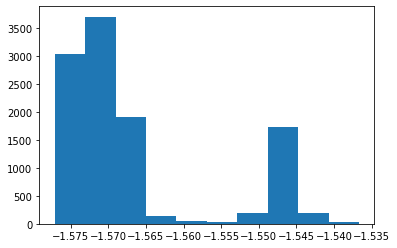

In [ ]:
#df.drop(df[df['angle(X,gravityMean)'] > -1.554].index, axis=0, inplace=True) #leżenie

print(df['angle(X,gravityMean)'].describe())
plt.hist(df['angle(X,gravityMean)'])
plt.show()

count    9624.000000
mean       -0.618666
std         0.330825
min        -1.839413
25%        -0.850741
50%        -0.729617
75%        -0.486540
max         0.720197
Name: angle(Y,gravityMean), dtype: float64


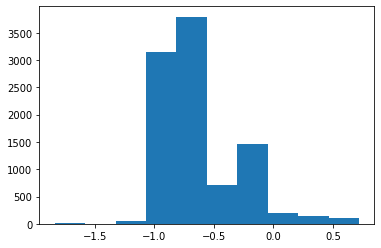

In [ ]:
print(df['angle(Y,gravityMean)'].describe())
plt.hist(df['angle(Y,gravityMean)'])
plt.show()

count    9624.000000
mean        0.091439
std         0.238769
min        -0.702915
25%         0.024822
50%         0.078247
75%         0.218134
max         0.845884
Name: angle(tBodyAccMean,gravity), dtype: float64


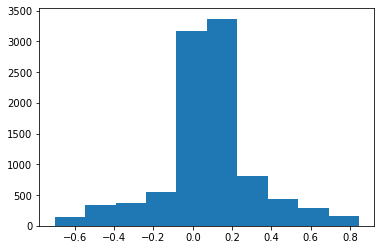

In [ ]:
print(df['angle(tBodyAccMean,gravity)'].describe())
plt.hist(df['angle(tBodyAccMean,gravity)'])
plt.show()

In [ ]:
df.drop(df[df['tGravityAcc-mean()-X'] > 4.2].index, axis=0, inplace=True) #leżenie
df.reset_index(inplace = True, drop = True)

count    9624.000000
mean        2.812403
std         0.947672
min         2.192609
25%         2.272334
50%         2.353811
75%         2.524699
max         6.111684
Name: tGravityAcc-mean()-X, dtype: float64


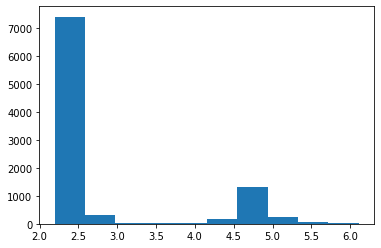

In [ ]:
print(df['tGravityAcc-mean()-X'].describe())
plt.hist(df['tGravityAcc-mean()-X'])
plt.show()

In [ ]:
df.shape

(11086, 572)

In [ ]:
df['Activity'].value_counts()

LAYING                2167
SITTING               2019
STANDING              1979
WALKING               1900
WALKING_UPSTAIRS      1633
WALKING_DOWNSTAIRS    1388
Name: Activity, dtype: int64

In [ ]:
df['void()'].value_counts()

3.0    4303
2.0    3778
1.0    2940
Name: void(), dtype: int64

In [ ]:
df.drop(['subject', 'void()'], axis = 1, inplace = True)

In [ ]:
df.head()

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1","fBodyAcc-bandsEnergy()-1,16.2","fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-1,24.1","fBodyAcc-bandsEnergy()-1,24.2","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-1,8.1","fBodyAcc-bandsEnergy()-1,8.2","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-17,24.1","fBodyAcc-bandsEnergy()-17,24.2","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-17,32.1","fBodyAcc-bandsEnergy()-17,32.2","fBodyAcc-bandsEnergy()-25,32","fBodyAcc-bandsEnergy()-25,32.1","fBodyAcc-bandsEnergy()-25,32.2","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-25,48.1","fBodyAcc-bandsEnergy()-25,48.2","fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-33,40.1","fBodyAcc-bandsEnergy()-33,40.2","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-33,48.1","fBodyAcc-bandsEnergy()-33,48.2","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-41,48.2","fBodyAcc-bandsEnergy()-49,56",...,"tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAccMag-arCoeff()1,tGravityAccMag-arCoeff()2,tGravityAccMag-arCoeff()3,tGravityAccMag-arCoeff()4,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,6.137246,2.503062,5.776680,3.242765,-1.352936,-1.537732,2.828395,8.603183,-2.228620,5.355308,3.987723,1.880228,1.384042,-2.163548,0.483175,2.942713,5.837147,2.957527,-1.770934,-5.580564,13.725027,1.724643,-0.519345,4.233416,0.953127,0.807692,2.624547,-3.005993,3.329588,2.866778,...,2.872206,2.988204,1.531084,-3.422785,1.852121,8.394366,3.246233,0.937300,4.725389,-1.578871,-0.442374,4.068593,4.705346,7.195449,-6.003664,0.607255,-1.499318,2.246320,2.861260,3.815614,-2.151051,-3.122438,-0.336110,6.357369,3.741996,1.394575,4.017211,2.481302,5.774536,1.754626,1.180533,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,5.740178,2.803435,5.484726,2.102368,-1.355854,-1.416568,2.527046,8.046001,-1.986672,5.284168,3.598328,1.892567,1.417711,-2.027475,0.436458,2.908602,5.819734,2.551773,-1.756530,-5.503246,13.251491,1.714753,-0.552312,3.566532,0.922455,0.726768,2.081277,-3.081267,3.140684,2.684137,...,2.450700,2.859864,1.585023,-3.387872,1.698743,8.112279,1.926083,2.348895,4.719540,-1.521161,-0.463599,4.063648,4.730261,7.221653,-5.789276,0.417687,-0.703212,2.488702,2.391994,5.884982,-2.187197,-3.306482,-0.814718,6.077734,3.720622,1.202847,4.050714,4.539801,4.618405,1.727481,0.220730,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,6.158630,2.495276,5.776843,3.314383,-1.352860,-1.537483,2.845718,8.618923,-2.232214,5.378175,3.998898,1.879989,1.372814,-2.169002,0.485317,2.957325,5.841023,2.974139,-1.775050,-5.600164,13.743085,1.726239,-0.505341,4.256780,0.957134,0.831419,2.640759,-2.999393,3.359696,2.86

In [ ]:
df_important = df[important_features].dropna(how = "any")

In [ ]:
df[important_features].isnull().sum().sort_values(ascending = False)

tGravityAcc-max()-Y                70
angle(Y,gravityMean)               68
fBodyAccMag-std()                  67
fBodyAccMag-mad()                  67
tBodyAccMag-mad()                  66
tGravityAcc-mean()-Y               64
tGravityAcc-max()-X                61
tGravityAcc-min()-Z                61
fBodyAccJerk-bandsEnergy()-1,16    58
tGravityAcc-mean()-Z               58
angle(X,gravityMean)               57
fBodyAccJerk-bandsEnergy()-9,16    56
tGravityAcc-min()-Y                56
tBodyAccJerk-std()-X               54
tBodyAcc-max()-X                   54
tGravityAcc-arCoeff()-Y,2          51
tGravityAcc-mean()-X               49
tGravityAcc-energy()-X             47
tGravityAcc-min()-X                46
tGravityAccMag-std()               46
Activity                            0
dtype: int64

In [ ]:
df_important.shape

(10323, 21)

In [ ]:
df_important.reset_index(drop = True, inplace=True)
df_important.head()

,tGravityAcc-mean()-X,tGravityAcc-max()-X,"angle(X,gravityMean)",tGravityAcc-mean()-Y,tGravityAcc-min()-X,tGravityAcc-max()-Y,tGravityAcc-min()-Y,"angle(Y,gravityMean)",tGravityAcc-energy()-X,tGravityAcc-min()-Z,tBodyAccJerk-std()-X,tGravityAcc-mean()-Z,fBodyAccMag-std(),tBodyAccMag-mad(),"fBodyAccJerk-bandsEnergy()-1,16","fBodyAccJerk-bandsEnergy()-9,16",tGravityAccMag-std(),tBodyAcc-max()-X,"tGravityAcc-arCoeff()-Y,2",fBodyAccMag-mad(),Activity
0,2.246320,-6.003664,-1.574191,2.861260,-2.151051,0.607255,-3.122438,-0.805700,1.531084,-0.336110,6.187228,3.815614,-1.000675,0.333673,-0.222043,2.361898,1.669987,0.013196,4.884036,2.454973,STANDING
1,2.488702,-5.789276,-1.568669,2.391994,-2.187197,0.417687,-3.306482,-0.612620,1.585023,-0.814718,5.072585,5.884982,-2.166122,-0.648997,-0.816047,2.594619,-0.544652,0.826578,4.296206,0.851388,WALKING_UPSTAIRS
2,4.616200,-3.868737,-1.548333,1.336379,-2.500477,0.037068,-3.788376,-0.139628,1.851578,0.559196,6.284308,0.032001,-0.806943,0.477658,-0.221541,2.361653,2.024442,-0.082896,4.599784,2.642219,LAYING
3,2.254465,-6.003662,-1.574094,2.830937,-2.153766,0.592027,-3.131598,-0.793443,1.532973,-0.272234,5.735377,3.575867,-1.633627,-0.217810,-0.303141,2.388836,0.550414,0.307738,4.544138,1.618935,WALKING
4,2.215603,-6.103897,-1.575809,2.458562,-2.182461,0.326710,-3.247359,-0.640703,1.523687,-0.479235,6.215459,4.215626,-1.467383,0.011579,-0.223032,2.362362,0.946387,-0.013348,3.953772,1.971007,SITTING


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
for i in x.columns:
  df[i].fillna((df[i].mean()), inplace=True)

In [ ]:
for i in x.columns:
  x[i].fillna((x[i].mean()), inplace=True)

In [ ]:
x = df.drop(['Activity'],axis=1)
Y = df['Activity']
x.head()

,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1","fBodyAcc-bandsEnergy()-1,16.2","fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-1,24.1","fBodyAcc-bandsEnergy()-1,24.2","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-1,8.1","fBodyAcc-bandsEnergy()-1,8.2","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-17,24.1","fBodyAcc-bandsEnergy()-17,24.2","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-17,32.1","fBodyAcc-bandsEnergy()-17,32.2","fBodyAcc-bandsEnergy()-25,32","fBodyAcc-bandsEnergy()-25,32.1","fBodyAcc-bandsEnergy()-25,32.2","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-25,48.1","fBodyAcc-bandsEnergy()-25,48.2","fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-33,40.1","fBodyAcc-bandsEnergy()-33,40.2","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-33,48.1","fBodyAcc-bandsEnergy()-33,48.2","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-41,48.2","fBodyAcc-bandsEnergy()-49,56","fBodyAcc-bandsEnergy()-49,56.1",...,"tGravityAcc-correlation()-Y,Z",tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAccMag-arCoeff()1,tGravityAccMag-arCoeff()2,tGravityAccMag-arCoeff()3,tGravityAccMag-arCoeff()4,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,6.137246,2.503062,5.776680,3.242765,-1.352936,-1.537732,2.828395,8.603183,-2.228620,5.355308,3.987723,1.880228,1.384042,-2.163548,0.483175,2.942713,5.837147,2.957527,-1.770934,-5.580564,13.725027,1.724643,-0.519345,4.233416,0.953127,0.807692,2.624547,-3.005993,3.329588,2.866778,-1.236317,...,2.988204,1.531084,-3.422785,1.852121,8.394366,3.246233,0.937300,4.725389,-1.578871,-0.442374,4.068593,4.705346,7.195449,-6.003664,0.607255,-1.499318,2.246320,2.861260,3.815614,-2.151051,-3.122438,-0.336110,6.357369,3.741996,1.394575,4.017211,2.481302,5.774536,1.754626,1.180533,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,5.740178,2.803435,5.484726,2.102368,-1.355854,-1.416568,2.527046,8.046001,-1.986672,5.284168,3.598328,1.892567,1.417711,-2.027475,0.436458,2.908602,5.819734,2.551773,-1.756530,-5.503246,13.251491,1.714753,-0.552312,3.566532,0.922455,0.726768,2.081277,-3.081267,3.140684,2.684137,-1.235737,...,2.859864,1.585023,-3.387872,1.698743,8.112279,1.926083,2.348895,4.719540,-1.521161,-0.463599,4.063648,4.730261,7.221653,-5.789276,0.417687,-0.703212,2.488702,2.391994,5.884982,-2.187197,-3.306482,-0.814718,6.077734,3.720622,1.202847,4.050714,4.539801,4.618405,1.727481,0.220730,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,6.158630,2.495276,5.776843,3.314383,-1.352860,-1.537483,2.845718,8.618923,-2.232214,5.378175,3.998898,1.879989,1.372814,-2.169002,0.485317,2.957325,5.841023,2.974139,-1.775050,-5.600164,13.743085,1.726239,-0.505341,4.256780,0.957134,0.831419,2.640759,-2.999393,3.359696,2.868557,-1.236481,...,3.717

In [ ]:
x = df_important.drop(['Activity'],axis=1)
Y = df_important['Activity']
x.head()

,tGravityAcc-mean()-X,tGravityAcc-max()-X,"angle(X,gravityMean)",tGravityAcc-mean()-Y,tGravityAcc-min()-X,tGravityAcc-max()-Y,tGravityAcc-min()-Y,"angle(Y,gravityMean)",tGravityAcc-energy()-X,tGravityAcc-min()-Z,tBodyAccJerk-std()-X,tGravityAcc-mean()-Z,fBodyAccMag-std(),tBodyAccMag-mad(),"fBodyAccJerk-bandsEnergy()-1,16","fBodyAccJerk-bandsEnergy()-9,16",tGravityAccMag-std(),tBodyAcc-max()-X,"tGravityAcc-arCoeff()-Y,2",fBodyAccMag-mad()
0,2.246320,-6.003664,-1.574191,2.861260,-2.151051,0.607255,-3.122438,-0.805700,1.531084,-0.336110,6.187228,3.815614,-1.000675,0.333673,-0.222043,2.361898,1.669987,0.013196,4.884036,2.454973
1,2.488702,-5.789276,-1.568669,2.391994,-2.187197,0.417687,-3.306482,-0.612620,1.585023,-0.814718,5.072585,5.884982,-2.166122,-0.648997,-0.816047,2.594619,-0.544652,0.826578,4.296206,0.851388
2,4.616200,-3.868737,-1.548333,1.336379,-2.500477,0.037068,-3.788376,-0.139628,1.851578,0.559196,6.284308,0.032001,-0.806943,0.477658,-0.221541,2.361653,2.024442,-0.082896,4.599784,2.642219
3,2.254465,-6.003662,-1.574094,2.830937,-2.153766,0.592027,-3.131598,-0.793443,1.532973,-0.272234,5.735377,3.575867,-1.633627,-0.217810,-0.303141,2.388836,0.550414,0.307738,4.544138,1.618935
4,2.215603,-6.103897,-1.575809,2.458562,-2.182461,0.326710,-3.247359,-0.640703,1.523687,-0.479235,6.215459,4.215626,-1.467383,0.011579,-0.223032,2.362362,0.946387,-0.013348,3.953772,1.971007


In [ ]:
# preprocessing
transformed = StandardScaler().fit_transform(x)

pca = PCA(n_components=150) #570  
principalComponents = pca.fit_transform(transformed)

principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, df[['Activity']]], axis = 1)

In [ ]:
pca_cols = ['pca' +str(i) for i in range(finalDf.shape[1]-1)]
pca_cols.append('Activity')
finalDf.columns = pca_cols

In [ ]:
finalDf.head(10)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,...,pca111,pca112,pca113,pca114,pca115,pca116,pca117,pca118,pca119,pca120,pca121,pca122,pca123,pca124,pca125,pca126,pca127,pca128,pca129,pca130,pca131,pca132,pca133,pca134,pca135,pca136,pca137,pca138,pca139,pca140,pca141,pca142,pca143,pca144,pca145,pca146,pca147,pca148,pca149,Activity
0,-9.868515,0.629778,2.828375,4.214965,-3.733393,2.300073,1.333928,-0.746059,3.324371,2.292594,1.161410,-0.690478,-2.466084,0.659373,2.000298,-3.243688,3.292406,0.043390,0.296765,1.646964,-2.406539,0.166192,-3.808297,-0.322978,0.150789,-0.098191,-1.548225,-0.292882,2.346078,-1.441489,0.024174,-2.330195,1.133278,-1.599303,0.222106,-1.567619,-2.292153,1.300287,-2.503423,-2.179305,...,0.344267,0.020467,0.038709,1.994467,0.247372,1.107170,0.148857,0.619900,1.445820,0.757525,-0.975602,-0.160986,0.272869,0.443736,0.179753,0.363861,-1.085488,0.001572,-0.014006,1.306149,-0.669057,0.948051,0.577185,0.322311,0.108132,0.274671,-0.001914,-0.811472,-0.072703,-0.115645,0.512807,-0.135146,-0.658402,-0.460410,-0.325171,-0.576164,0.586762,-0.191405,0.235077,STANDING
1,15.182189,-11.917581,6.800766,-6.223974,-0.578041,-1.927882,0.973842,0.472682,1.372557,0.380449,-0.086223,-0.065774,0.121026,-0.339324,-0.538885,0.143066,0.028216,0.293799,-0.068352,-0.229391,-0.180119,0.040641,0.139409,-0.056021,0.335919,0.024899,-0.224748,-0.041222,0.141582,0.358971,-0.069138,-0.021658,0.016908,-0.068588,0.012952,0.214476,-0.049532,-0.081242,0.004331,0.191597,...,0.113911,-0.031976,0.013902,0.039902,-0.004876,-0.011215,-0.070728,0.025477,0.007854,0.012765,-0.000489,0.045540,-0.032648,0.046236,-0.020092,0.023959,-0.024960,0.012887,0.014882,0.047905,0.002449,-0.025254,-0.042179,0.014018,0.032712,0.007473,-0.018644,-0.009012,0.025270,0.004793,0.022962,0.043943,-0.037696,-0.008552,-0.023436,-0.015348,-0.009294,-0.013363,-0.016850,WALKING_UPSTAIRS
2,-14.580259,5.619958,-4.069189,-7.787734,0.878104,0.303291,1.051769,0.133475,-0.016229,0.263045,0.857220,-0.634424,-0.123857,0.950050,-0.729070,0.037165,-0.082233,-0.020138,-0.298255,-0.174037,-0.420153,-0.196191,-0.112150,-0.049525,-0.017092,0.012825,-0.020684,-0.020315,0.073621,0.029386,0.222788,0.274189,-0.138575,0.046391,-0.012961,-0.223201,-0.431720,0.327622,0.087256,-0.062085,...,0.032637,-0.031307,-0.027795,0.057815,0.014330,-0.025503,0.035311,0.059221,0.068623,-0.025756,0.017127,0.018892,-0.028556,-0.044953,0.047508,0.045179,-0.003456,0.057745,-0.009202,0.017959,-0.030424,0.014342,-0.005020,0.032726,0.000352,0.010070,-0.016666,0.048586,-0.003868,-0.002255,-0.024739,0.008536,0.008858,0.021923,0.015838,0.038129,0.025284,-0.029251,-0.022034,LAYING
3,4.174577,-4.454495,-2.511396,0.585486,-4.463802,1.739995,0.207283,2.703935,1.504961,-0.454057,-0.901612,2.506330,-2.193589,0.848543,-1.000050,2.084814,1.117662,-2.383438,1.502138,0.059461,-0.398810,0.821002,0.524118,-1.304250,-0.191483,-1.999770,-0.652585,3.958762,0.323417,-1.150428,1.736117,0.220057,2.343062,-0.531853,-0.352947,-0.414835,1.700926,-0.764834,-0.053581,-0.622287,...,0.372387,-0.417862,-0.144511,-0.185655,-0.325116,0.909063,0.967732,-0.647909,0.696221,-0.804518,0.463110,0.389876,0.332426,1.045409,0.379855,0.447733,0.039985,0.100175,0.529705,-0.431544,0.550597,0.888657,-0.035617,-0.286921,-0.055709,0.937395,-0.708835,0.097845,-0.233453,0.198176,-0.346459,0.147760,0.311253,0.116252,0.362657,-0.692840,0.131022,0.322301,-0.350188,WALKING
4,-8.356329,-8.392350,-3.676959,6.394217,9.451748,-1.473303,-2.192825,0.588617,6.662930,0.747023,2.683310,1.657368,-1.868449,2.717375,-2.330455,-1.607091,3.152610,-0.422138,1.318408,-1.570769,-1.953400,-2.867893,-0.613695,0.863784,-2.005607,-1.963646,-1.828640,2.389594,-3.260936,0.735312,0.472125,-2.126646,0.858699,1.415285,1.377315,1.731721,-0.484994,2.794348,-2.366648,-0.061372,...,1.275796,-0.568318,1.223794,0.654351,0

In [ ]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
def preprocessingPCA(x,Y,pca = 20):
  # preprocessing
  transformed = StandardScaler().fit_transform(x)

  pca = PCA(n_components=pca) #570
  principalComponents = pca.fit_transform(transformed)

  principalDf = pd.DataFrame(data = principalComponents)
  finalDf = pd.concat([principalDf,Y], axis = 1)

  pca_cols = ['pca' +str(i) for i in range(finalDf.shape[1]-1)]
  pca_cols.append('Activity')
  finalDf.columns = pca_cols

  #plot variance 
  exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

  fig = px.area(
      x=range(1, exp_var_cumul.shape[0] + 1),
      y=exp_var_cumul,
      labels={"x": "# Components", "y": "Explained Variance"}
  )
  fig.show()

  fig2 = plt.figure(figsize=(16,10))
  sns.scatterplot(
      x="pca0", y="pca2",
      hue="Activity",
      palette=sns.color_palette("hls", 6),
      data=finalDf,
      legend="full"
  )

  fig2.show()

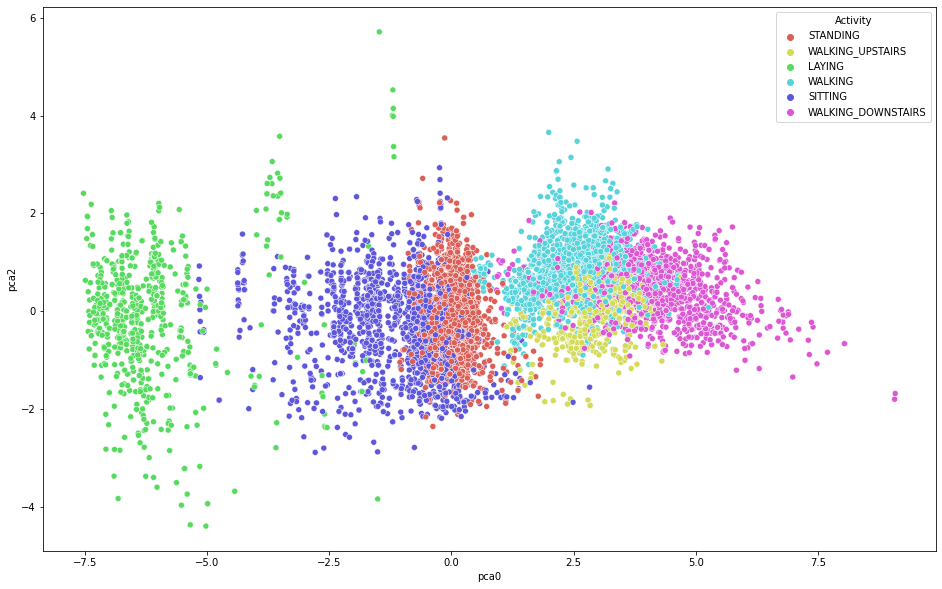

In [ ]:
preprocessingPCA(x,Y)

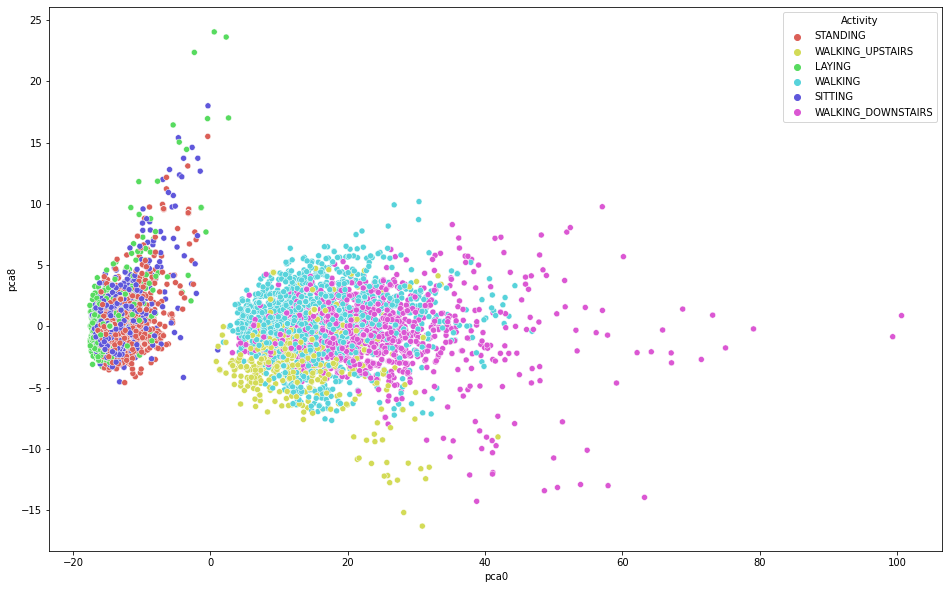

In [ ]:
  plt.figure(figsize=(16,10))
  sns.scatterplot(
      x="pca0", y="pca8",
      hue="Activity",
      palette=sns.color_palette("hls", 6),
      data=finalDf,
      legend="full"
  )

In [ ]:
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [ ]:
# For reproducability of the results
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])

In [ ]:
df.head()

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1","fBodyAcc-bandsEnergy()-1,16.2","fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-1,24.1","fBodyAcc-bandsEnergy()-1,24.2","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-1,8.1","fBodyAcc-bandsEnergy()-1,8.2","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-17,24.1","fBodyAcc-bandsEnergy()-17,24.2","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-17,32.1","fBodyAcc-bandsEnergy()-17,32.2","fBodyAcc-bandsEnergy()-25,32","fBodyAcc-bandsEnergy()-25,32.1","fBodyAcc-bandsEnergy()-25,32.2","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-25,48.1","fBodyAcc-bandsEnergy()-25,48.2","fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-33,40.1","fBodyAcc-bandsEnergy()-33,40.2","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-33,48.1","fBodyAcc-bandsEnergy()-33,48.2","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-41,48.2","fBodyAcc-bandsEnergy()-49,56",...,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAccMag-arCoeff()1,tGravityAccMag-arCoeff()2,tGravityAccMag-arCoeff()3,tGravityAccMag-arCoeff()4,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),pca-one,pca-two,pca-three
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,6.137246,2.503062,5.776680,3.242765,-1.352936,-1.537732,2.828395,8.603183,-2.228620,5.355308,3.987723,1.880228,1.384042,-2.163548,0.483175,2.942713,5.837147,2.957527,-1.770934,-5.580564,13.725027,1.724643,-0.519345,4.233416,0.953127,0.807692,2.624547,-3.005993,3.329588,2.866778,...,-3.422785,1.852121,8.394366,3.246233,0.937300,4.725389,-1.578871,-0.442374,4.068593,4.705346,7.195449,-6.003664,0.607255,-1.499318,2.246320,2.861260,3.815614,-2.151051,-3.122438,-0.336110,6.357369,3.741996,1.394575,4.017211,2.481302,5.774536,1.754626,1.180533,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,-9.859396,2.415542,-2.419986
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,5.740178,2.803435,5.484726,2.102368,-1.355854,-1.416568,2.527046,8.046001,-1.986672,5.284168,3.598328,1.892567,1.417711,-2.027475,0.436458,2.908602,5.819734,2.551773,-1.756530,-5.503246,13.251491,1.714753,-0.552312,3.566532,0.922455,0.726768,2.081277,-3.081267,3.140684,2.684137,...,-3.387872,1.698743,8.112279,1.926083,2.348895,4.719540,-1.521161,-0.463599,4.063648,4.730261,7.221653,-5.789276,0.417687,-0.703212,2.488702,2.391994,5.884982,-2.187197,-3.306482,-0.814718,6.077734,3.720622,1.202847,4.050714,4.539801,4.618405,1.727481,0.220730,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,12.105373,-8.760876,14.451262
2,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,3.355701,5.695567,2.592818,5.705653,1.968913,-1.353831,-1.490043,2.591209,8.453702,-2.161158,5.266233,3.829890,1.883672,1.424886,-2.101272,0.470061,2.911815,5.814566,2.874860,-1.751153,-5.505907,13.659326,1.708279,-0.517098,4.159184,0.895400,0.763995,2.589019,-3.171689,3.110759,2.847134,...,-3.414331,1.847189,8.394366,3.246233,1.256970

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(x.values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.46238085 0.20605244 0.09364255]


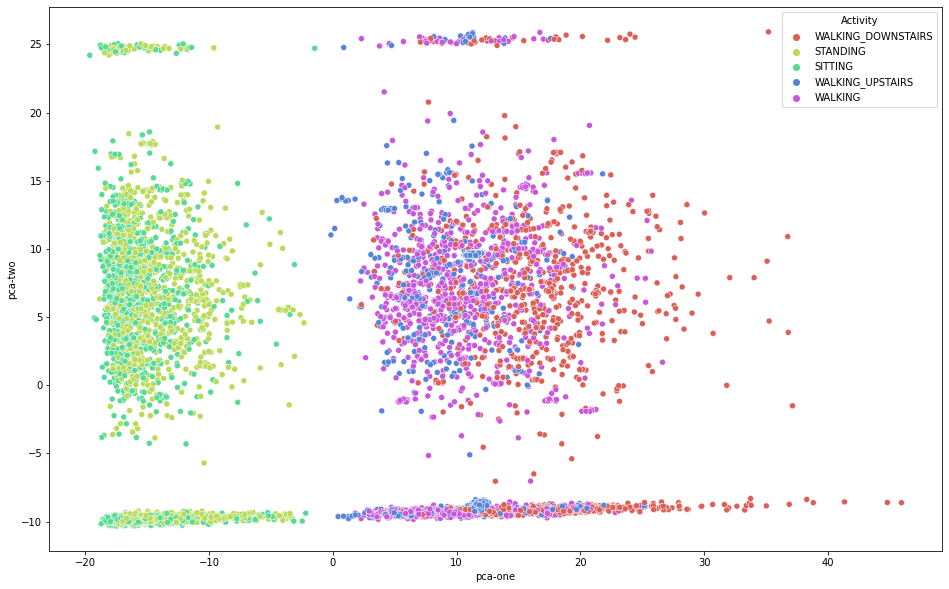

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Activity",
    palette=sns.color_palette("hls", 6),
    data=df.loc[rndperm,:],
    legend="full"
)

In [ ]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[x.columns].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.37402134 0.16719745 0.07293373]


In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.811s...
[t-SNE] Computed neighbors for 10000 samples in 103.217s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.712952
[t-SNE] KL divergence after 300 iterations: 2.792974
t-SNE done! Time elapse

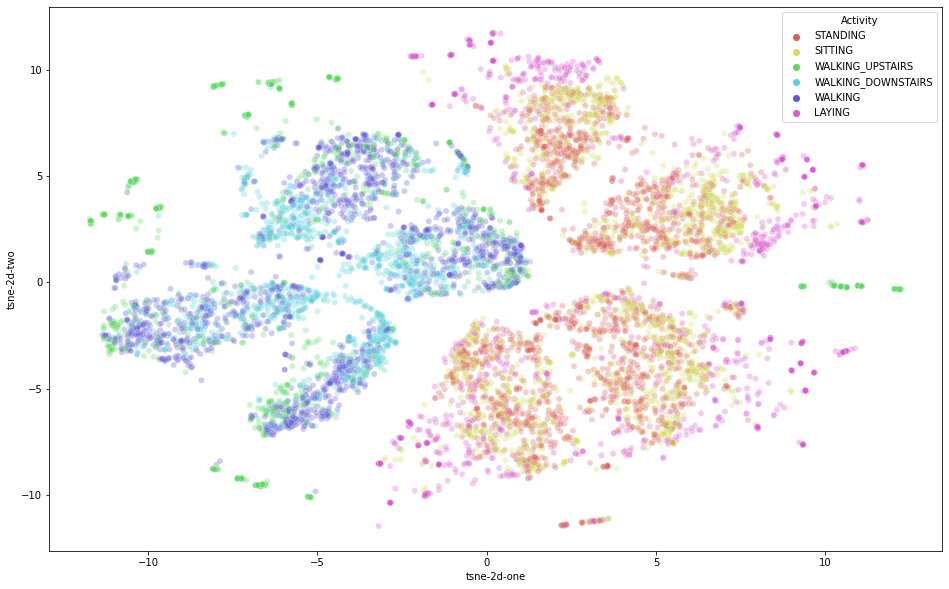

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Activity",
    palette=sns.color_palette("hls", 6),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9912984941497454


In [ ]:
X_for_tsne = df.drop(['Activity'], axis=1)

In [ ]:
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8937 samples in 0.676s...
[t-SNE] Computed neighbors for 8937 samples in 48.130s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8937
[t-SNE] Computed conditional probabilities for sample 2000 / 8937
[t-SNE] Computed conditional probabilities for sample 3000 / 8937
[t-SNE] Computed conditional probabilities for sample 4000 / 8937
[t-SNE] Computed conditional probabilities for sample 5000 / 8937
[t-SNE] Computed conditional probabilities for sample 6000 / 8937
[t-SNE] Computed conditional probabilities for sample 7000 / 8937
[t-SNE] Computed conditional probabilities for sample 8000 / 8937
[t-SNE] Computed conditional probabilities for sample 8937 / 8937
[t-SNE] Mean sigma: 3.599828
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.027893
[t-SNE] KL divergence after 1000 iterations: 1.535674


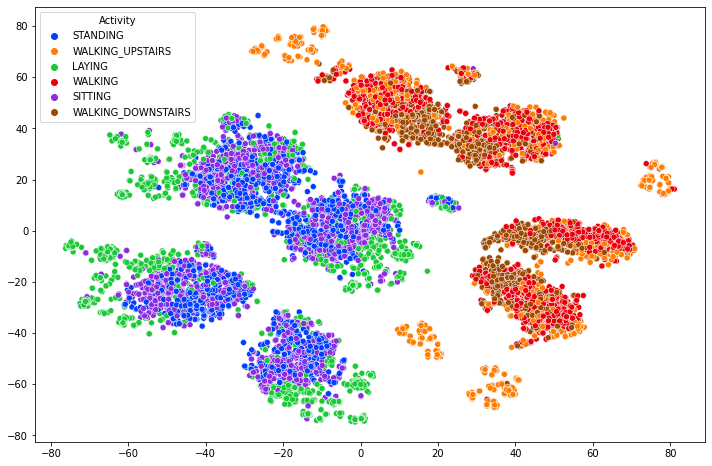

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = df["Activity"],palette="bright")

In [ ]:
# zrobić confusion matrix

In [ ]:
# tBodyAccMagmean, Gyro, tAccMean 

In [ ]:
#for col in df:
  #print(col)

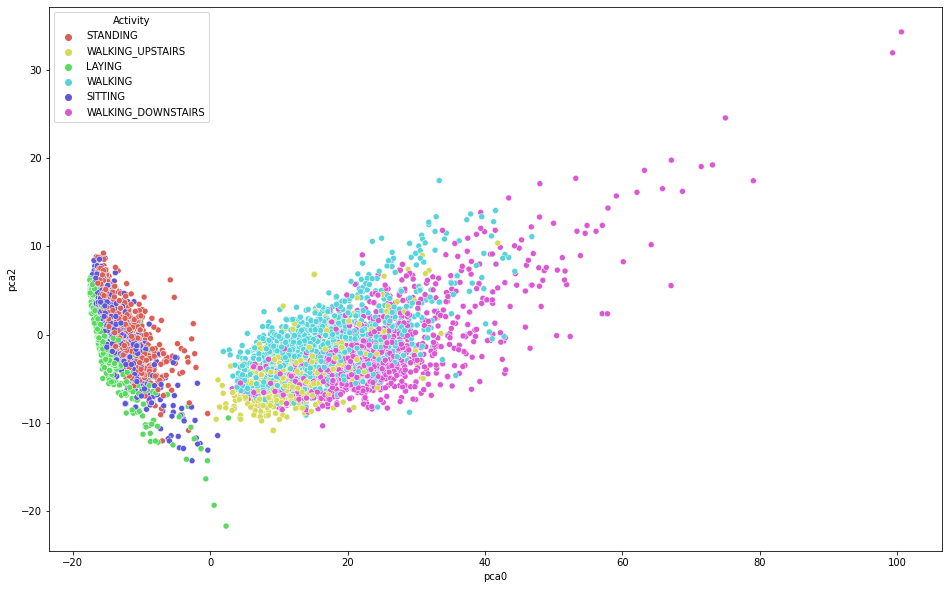

In [ ]:
  plt.figure(figsize=(16,10))
  sns.scatterplot(
      x="pca0", y="pca2",
      hue="Activity",
      palette=sns.color_palette("hls", 6),
      data=finalDf,
      legend="full"
  )

In [ ]:
df.shape

(11086, 570)

In [ ]:
for i in x.columns:
  df[i].fillna((df[i].mean()), inplace=True)

In [ ]:
df.dropna(how='any', inplace=True)

In [ ]:
# rozmiary różnych modeli - wielkość aka kB

df_shuffle = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df_shuffle.head()

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1","fBodyAcc-bandsEnergy()-1,16.2","fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-1,24.1","fBodyAcc-bandsEnergy()-1,24.2","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-1,8.1","fBodyAcc-bandsEnergy()-1,8.2","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-17,24.1","fBodyAcc-bandsEnergy()-17,24.2","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-17,32.1","fBodyAcc-bandsEnergy()-17,32.2","fBodyAcc-bandsEnergy()-25,32","fBodyAcc-bandsEnergy()-25,32.1","fBodyAcc-bandsEnergy()-25,32.2","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-25,48.1","fBodyAcc-bandsEnergy()-25,48.2","fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-33,40.1","fBodyAcc-bandsEnergy()-33,40.2","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-33,48.1","fBodyAcc-bandsEnergy()-33,48.2","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-41,48.2","fBodyAcc-bandsEnergy()-49,56",...,"tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAccMag-arCoeff()1,tGravityAccMag-arCoeff()2,tGravityAccMag-arCoeff()3,tGravityAccMag-arCoeff()4,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std()
0,SITTING,-1.558279,-0.141958,-2.408156,-1.887044,0.178166,0.165330,4.651745,-3.086017,3.618901,6.156749,2.497222,5.776115,3.309357,-1.352877,-1.536764,2.843899,8.614496,-2.232496,5.378540,4.000094,1.879964,1.372554,-2.169755,0.485654,2.958287,5.841807,2.975820,-1.775337,-5.603472,13.743181,1.726424,-0.503033,4.257085,0.957471,0.834649,2.641240,-2.999389,3.361452,2.868412,...,2.929805,3.177490,1.742560,-4.064429,1.544477,7.363061,2.298946,0.758093,4.594997,-1.559212,-0.518281,3.994528,4.713817,7.160910,-5.053654,0.031869,-2.451281,3.385040,1.342037,1.214326,-2.323384,-3.760065,0.267435,5.639972,3.464314,1.327129,4.005850,4.476734,4.939286,1.731633,-0.511600,5.057116,2.803595,5.057131,-0.749697,3.222761,-0.937174,-1.024062,3.263656,1.837713
1,WALKING,-1.572103,-0.897167,-2.458966,-1.768377,0.462140,-1.138854,7.941958,-11.933823,2.360223,4.719335,2.627001,5.438610,-0.796200,-1.354129,-1.284314,2.307728,8.431585,-1.885127,5.163483,3.848690,1.898336,1.504665,-2.107930,0.401440,2.582392,5.815599,2.358631,-1.640514,-5.467086,13.198093,1.628525,-0.601785,3.468161,0.725743,0.664980,1.969547,-3.320752,3.138066,2.673032,...,-1.791771,3.491236,1.535720,-3.515713,1.851408,8.394366,3.246233,2.348895,4.710811,-1.525691,-0.517196,4.055408,4.734532,7.154895,-6.004518,0.661527,-1.355916,2.266342,3.087789,4.137557,-2.155254,-3.009729,-0.417948,6.214214,3.684136,1.155618,4.006874,4.682481,4.494740,1.718769,-0.203825,4.411848,4.576503,2.737800,-6.073376,1.455348,-0.803914,-0.527005,3.177445,-0.863624
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-5.793913,3.621984,6.158630,2.495276,5.776843,3.314383,-1.352860,-1.537483,2.845718,8.618923,-2.232214,5.378175,3.998898,1.879989,1.372814,-2.169002,0.485317,2.957325,5.841023,2.974139,-1.775050,-5.600164,13.743085,1.726239,-0.505341,4.256780,0.957134,0.831419,2.640759,-2.999393,3.359696,2.868557,...

In [ ]:
x_shuffle = df_shuffle.drop(['Activity'],axis=1)
y_shuffle = df_shuffle['Activity']
df_shuffle.head()

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1","fBodyAcc-bandsEnergy()-1,16.2","fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-1,24.1","fBodyAcc-bandsEnergy()-1,24.2","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-1,8.1","fBodyAcc-bandsEnergy()-1,8.2","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-17,24.1","fBodyAcc-bandsEnergy()-17,24.2","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-17,32.1","fBodyAcc-bandsEnergy()-17,32.2","fBodyAcc-bandsEnergy()-25,32","fBodyAcc-bandsEnergy()-25,32.1","fBodyAcc-bandsEnergy()-25,32.2","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-25,48.1","fBodyAcc-bandsEnergy()-25,48.2","fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-33,40.1","fBodyAcc-bandsEnergy()-33,40.2","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-33,48.1","fBodyAcc-bandsEnergy()-33,48.2","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-41,48.2","fBodyAcc-bandsEnergy()-49,56",...,"tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAccMag-arCoeff()1,tGravityAccMag-arCoeff()2,tGravityAccMag-arCoeff()3,tGravityAccMag-arCoeff()4,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std()
0,SITTING,-1.558279,-0.141958,-2.408156,-1.887044,0.178166,0.165330,4.651745,-3.086017,3.618901,6.156749,2.497222,5.776115,3.309357,-1.352877,-1.536764,2.843899,8.614496,-2.232496,5.378540,4.000094,1.879964,1.372554,-2.169755,0.485654,2.958287,5.841807,2.975820,-1.775337,-5.603472,13.743181,1.726424,-0.503033,4.257085,0.957471,0.834649,2.641240,-2.999389,3.361452,2.868412,...,2.929805,3.177490,1.742560,-4.064429,1.544477,7.363061,2.298946,0.758093,4.594997,-1.559212,-0.518281,3.994528,4.713817,7.160910,-5.053654,0.031869,-2.451281,3.385040,1.342037,1.214326,-2.323384,-3.760065,0.267435,5.639972,3.464314,1.327129,4.005850,4.476734,4.939286,1.731633,-0.511600,5.057116,2.803595,5.057131,-0.749697,3.222761,-0.937174,-1.024062,3.263656,1.837713
1,WALKING,-1.572103,-0.897167,-2.458966,-1.768377,0.462140,-1.138854,7.941958,-11.933823,2.360223,4.719335,2.627001,5.438610,-0.796200,-1.354129,-1.284314,2.307728,8.431585,-1.885127,5.163483,3.848690,1.898336,1.504665,-2.107930,0.401440,2.582392,5.815599,2.358631,-1.640514,-5.467086,13.198093,1.628525,-0.601785,3.468161,0.725743,0.664980,1.969547,-3.320752,3.138066,2.673032,...,-1.791771,3.491236,1.535720,-3.515713,1.851408,8.394366,3.246233,2.348895,4.710811,-1.525691,-0.517196,4.055408,4.734532,7.154895,-6.004518,0.661527,-1.355916,2.266342,3.087789,4.137557,-2.155254,-3.009729,-0.417948,6.214214,3.684136,1.155618,4.006874,4.682481,4.494740,1.718769,-0.203825,4.411848,4.576503,2.737800,-6.073376,1.455348,-0.803914,-0.527005,3.177445,-0.863624
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-5.793913,3.621984,6.158630,2.495276,5.776843,3.314383,-1.352860,-1.537483,2.845718,8.618923,-2.232214,5.378175,3.998898,1.879989,1.372814,-2.169002,0.485317,2.957325,5.841023,2.974139,-1.775050,-5.600164,13.743085,1.726239,-0.505341,4.256780,0.957134,0.831419,2.640759,-2.999393,3.359696,2.868557,...

In [ ]:
# https://www.kaggle.com/kabirnagpal/feature-selection-and-stacking-f1-score-99?fbclid=IwAR35kya3LQCksYPHBKj-VLXX5DnDR0u6zjYFPbDYzwt4jO8BifqFeXI2gVs

X_train_shuffle, X_test_shuffle, y_train_shuffle, y_test_shuffle = train_test_split(x_shuffle, y_shuffle, test_size = 0.2, random_state = 42)

In [ ]:
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="rbf"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    RidgeClassifier(),
    LogisticRegression(max_iter=200)
]

In [ ]:
def f_score(X_train, X_test, y_train, y_test):
    for clf in classifiers:
        s = time.time()
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        f = f1_score(y_true=y_test,y_pred=y_pred,average="macro")
        e = time.time()
        print(f"Score: {round(f,3)} \t Time(in secs): {round(e-s,3)} \t Classifier: {clf.__class__.__name__}")


In [ ]:
# usuwanie NaN
f_score(X_train_shuffle, X_test_shuffle, y_train_shuffle, y_test_shuffle)

Score: 0.849 	 Time(in secs): 13.542 	 Classifier: KNeighborsClassifier
Score: 0.907 	 Time(in secs): 30.546 	 Classifier: SVC
Score: 0.955 	 Time(in secs): 4.67 	 Classifier: DecisionTreeClassifier
Score: 0.979 	 Time(in secs): 11.021 	 Classifier: RandomForestClassifier
Score: 0.747 	 Time(in secs): 0.141 	 Classifier: GaussianNB
Score: 0.981 	 Time(in secs): 0.263 	 Classifier: RidgeClassifier
Score: 0.979 	 Time(in secs): 7.432 	 Classifier: LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# mean zamiast NaN

f_score(X_train_shuffle, X_test_shuffle, y_train_shuffle, y_test_shuffle)

Score: 0.849 	 Time(in secs): 13.425 	 Classifier: KNeighborsClassifier
Score: 0.907 	 Time(in secs): 30.635 	 Classifier: SVC
Score: 0.957 	 Time(in secs): 4.663 	 Classifier: DecisionTreeClassifier
Score: 0.98 	 Time(in secs): 10.983 	 Classifier: RandomForestClassifier
Score: 0.747 	 Time(in secs): 0.149 	 Classifier: GaussianNB
Score: 0.981 	 Time(in secs): 0.287 	 Classifier: RidgeClassifier
Score: 0.979 	 Time(in secs): 7.538 	 Classifier: LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42)

In [ ]:
f_score(X_train, X_test, y_train, y_test)

Score: 0.862 	 Time(in secs): 13.047 	 Classifier: KNeighborsClassifier
Score: 0.906 	 Time(in secs): 30.129 	 Classifier: SVC
Score: 0.953 	 Time(in secs): 4.751 	 Classifier: DecisionTreeClassifier
Score: 0.988 	 Time(in secs): 10.91 	 Classifier: RandomForestClassifier
Score: 0.75 	 Time(in secs): 0.144 	 Classifier: GaussianNB
Score: 0.981 	 Time(in secs): 0.303 	 Classifier: RidgeClassifier
Score: 0.984 	 Time(in secs): 7.649 	 Classifier: LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
important_features = ['tGravityAcc-mean()-X', 'tGravityAcc-max()-X', 'angle(X,gravityMean)', 'tGravityAcc-mean()-Y', 'tGravityAcc-min()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-min()-Y', 'angle(Y,gravityMean)', 'tGravityAcc-energy()-X', 'tGravityAcc-min()-Z', 'tBodyAccJerk-std()-X', 'tGravityAcc-mean()-Z', 'fBodyAccMag-std()', 'tBodyAccMag-mad()', 'fBodyAccJerk-bandsEnergy()-1,16', 'fBodyAccJerk-bandsEnergy()-9,16', 'tGravityAccMag-std()', 'tBodyAcc-max()-X', 'tGravityAcc-arCoeff()-Y,2', 'fBodyAccMag-mad()','Activity']

df_sample = df[important_features]

In [ ]:
df_sample.head()

,tGravityAcc-mean()-X,tGravityAcc-max()-X,"angle(X,gravityMean)",tGravityAcc-mean()-Y,tGravityAcc-min()-X,tGravityAcc-max()-Y,tGravityAcc-min()-Y,"angle(Y,gravityMean)",tGravityAcc-energy()-X,tGravityAcc-min()-Z,tBodyAccJerk-std()-X,tGravityAcc-mean()-Z,fBodyAccMag-std(),tBodyAccMag-mad(),"fBodyAccJerk-bandsEnergy()-1,16","fBodyAccJerk-bandsEnergy()-9,16",tGravityAccMag-std(),tBodyAcc-max()-X,"tGravityAcc-arCoeff()-Y,2",fBodyAccMag-mad(),Activity
0,2.246320,-6.003664,-1.574191,2.861260,-2.151051,0.607255,-3.122438,-0.805700,1.531084,-0.336110,6.187228,3.815614,-1.000675,0.333673,-0.222043,2.361898,1.669987,0.013196,4.884036,2.454973,STANDING
1,2.488702,-5.789276,-1.568669,2.391994,-2.187197,0.417687,-3.306482,-0.612620,1.585023,-0.814718,5.072585,5.884982,-2.166122,-0.648997,-0.816047,2.594619,-0.544652,0.826578,4.296206,0.851388,WALKING_UPSTAIRS
2,4.616200,-3.868737,-1.548333,1.336379,-2.500477,0.037068,-3.788376,-0.139628,1.851578,0.559196,6.284308,0.032001,-0.806943,0.477658,-0.221541,2.361653,2.024442,-0.082896,4.599784,2.642219,LAYING
3,2.254465,-6.003662,-1.574094,2.830937,-2.153766,0.592027,-3.131598,-0.793443,1.532973,-0.272234,5.735377,3.575867,-1.633627,-0.217810,-0.303141,2.388836,0.550414,0.307738,4.544138,1.618935,WALKING
4,4.616200,-3.868737,-1.548333,1.336379,-2.500477,0.037068,NaN,-0.139628,1.851578,0.559196,6.284308,0.032001,-0.806943,0.477658,-0.221541,2.361653,2.024442,-0.082896,4.599784,2.642219,LAYING


In [ ]:
important_features = important_features[:13]
important_features.append('Activity')

In [ ]:
df_important = df[important_features].dropna(how = "any")
df_important.reset_index(drop = True, inplace=True)
df_important.head()

x = df_important.drop(['Activity'],axis=1)
y = df_important['Activity']

**Model selection**

In [ ]:
labels=['STANDING', 'WALKING_UPSTAIRS', 'LAYING', 'WALKING', 'SITTING','WALKING_DOWNSTAIRS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
#skalowanie 

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': np.arange(3,15,2)}]
clf = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['entropy', 'gini'],
                  

In [ ]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 13}

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline

In [ ]:
tree_param = [{'clf__criterion': ['entropy', 'gini'], 'clf__splitter': ['best', 'random'], 'clf__max_depth': np.arange(3,15,2)}]

#scoring = {'g_mean': make_scorer(geometric_mean_score)}

norm = StandardScaler()
pipeline = Pipeline([('transformer', norm), ('clf', DecisionTreeClassifier())])

clf = GridSearchCV(pipeline, tree_param, cv=10, n_jobs=-1, verbose=1)
#clf = GridSearchCV(pipeline, {}, cv=10, scoring=scoring, n_jobs=1, verbose=1, refit=False)
clf.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   11.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('transformer',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                               

In [ ]:
print(clf.best_params_)

y_pred = clf.predict(X_test)
f1_score(y_true=y_test,y_pred=y_pred,average="macro")

{'clf__criterion': 'entropy', 'clf__max_depth': 13, 'clf__splitter': 'best'}


0.9599274596406137

In [ ]:
norm = RobustScaler()
pipeline = Pipeline([('transformer', norm), ('clf', DecisionTreeClassifier())])

clf = GridSearchCV(pipeline, tree_param, cv=10, n_jobs=-1, verbose=1)
#clf = GridSearchCV(pipeline, {}, cv=10, scoring=scoring, n_jobs=1, verbose=1, refit=False)
clf.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('transformer',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                   

In [ ]:
print(clf.best_params_)

y_pred = clf.predict(X_test)
f1_score(y_true=y_test,y_pred=y_pred,average="macro")

{'clf__criterion': 'entropy', 'clf__max_depth': 13, 'clf__splitter': 'best'}


0.9611607862061914

In [ ]:
norm = StandardScaler()
pipeline = Pipeline([('transformer', norm), ('clf', DecisionTreeClassifier())])

clf = GridSearchCV(pipeline, tree_param, cv=10, n_jobs=-1, verbose=1)
#clf = GridSearchCV(pipeline, {}, cv=10, scoring=scoring, n_jobs=1, verbose=1, refit=False)
clf.fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   18.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('transformer',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                               

In [ ]:
print(clf.best_params_)

y_pred = clf.predict(X_test)
f1_score(y_true=y_test,y_pred=y_pred,average="macro")

{'clf__criterion': 'entropy', 'clf__max_depth': 15, 'clf__splitter': 'best'}


0.9567796979944218

In [ ]:
norm = MinMaxScaler()
pipeline = Pipeline([('transformer', norm), ('clf', DecisionTreeClassifier())])

clf = GridSearchCV(pipeline, tree_param, cv=10, n_jobs=-1, verbose=1)
#clf = GridSearchCV(pipeline, {}, cv=10, scoring=scoring, n_jobs=1, verbose=1, refit=False)
clf.fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   18.4s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('transformer',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
           

In [ ]:
print(clf.best_params_)

y_pred = clf.predict(X_test)
f1_score(y_true=y_test,y_pred=y_pred,average="macro")

{'clf__criterion': 'entropy', 'clf__max_depth': 17, 'clf__splitter': 'best'}


0.9556031935116636

In [ ]:
scores.mean()

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=13)
scores = cross_val_score(estimator=clf, X=x, y=y, cv=7, n_jobs=4)

In [ ]:
scores.mean()

0.9560170679864217

In [ ]:
from sklearn.metrics import confusion_matrix

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)

array([[421,   0,   0,   0,   0,   0],
       [  0, 350,  13,   0,   0,   0],
       [  0,  25, 380,   0,   0,   0],
       [  0,   0,   0, 348,   5,   7],
       [  0,   0,   0,  12, 232,   5],
       [  0,   0,   0,  14,   3, 286]])

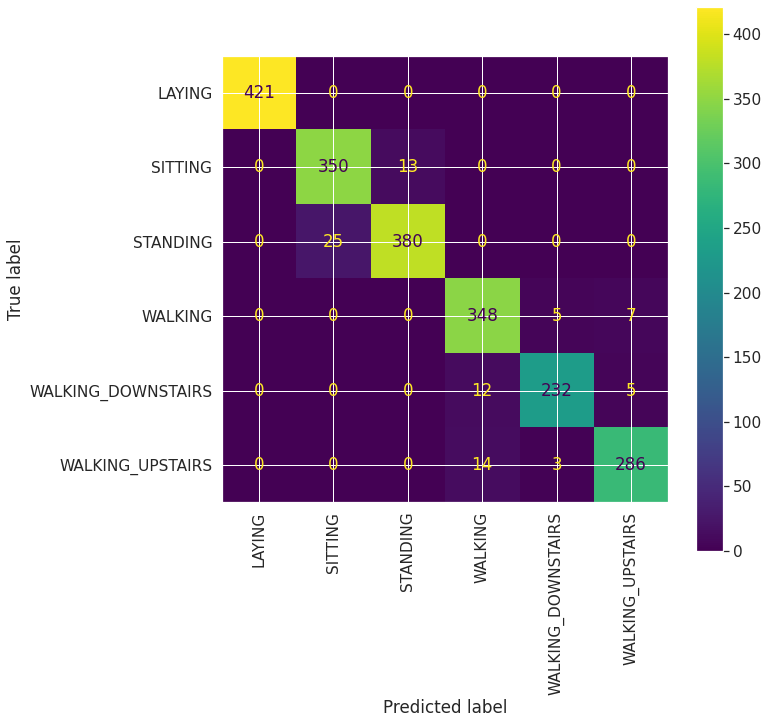

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test, ax=ax, xticks_rotation = 'vertical', values_format = 'd')